## 프로젝트#1 세가지 품종, 분류해 볼 수 있겠어요?

### (1) 필요한 모듈 import하기

In [90]:
import sklearn
from sklearn.datasets import load_digits, load_wine,load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### (2) 데이터 준비 (손글씨, 와인, 유방암 )

In [2]:
def prepare_data(loaded_data):
    loaded_result = loaded_data
    result_data = loaded_result.data
    result_label = loaded_result.target
    
    return loaded_result, result_data, result_label

#손글씨
digits, digits_data, digits_label = prepare_data(load_digits())
#와인
wine, wine_data, wine_label = prepare_data(load_wine())
#유방암
cancer, cancer_data, cancer_label = prepare_data(load_breast_cancer())


### (3) 데이터 이해하기

In [3]:
def check_data(data, title):
    print( title, ":target names", data.target_names)
    print( title, ":describe", data.keys())
    print( title, ":shape", data.data.shape)
    print( title, ":feature", data.feature_names[:30])
    print( "===============================================")

check_data(digits, "[손글씨]")
check_data(wine, "[와인]")    
check_data(cancer, "[유방암]")

[손글씨] :target names [0 1 2 3 4 5 6 7 8 9]
[손글씨] :describe dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[손글씨] :shape (1797, 64)
[손글씨] :feature ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5']
[와인] :target names ['class_0' 'class_1' 'class_2']
[와인] :describe dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
[와인] :shape (178, 13)
[와인] :feature ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[유방암] :target names ['malign

### (4) train, test 데이터 분리

In [70]:

#손글씨
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state = 11)
#와인
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(wine_data, wine_label, test_size=0.2, random_state = 11)
#유방암
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state = 11)

dict = [{'key':"손글씨", 'X_train':X_train, 'X_test':X_test, 'y_train':y_train, 'y_test':y_test},
        {'key':"와인", 'X_train':X_train_wine, 'X_test':X_test_wine, 'y_train':y_train_wine, 'y_test':y_test_wine},
        {'key':"유방암", 'X_train':X_train_cancer, 'X_test':X_test_cancer, 'y_train':y_train_cancer, 'y_test':y_test_cancer},
       ]

### (5) 다양한 모델로 학습시켜보기

In [40]:
def model_decision_tree(X_train, X_test, y_train, no):
    decision_tree = DecisionTreeClassifier(random_state=no)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    
    return y_pred

def model_random_forest(X_train, X_test, y_train, no):
    randomf = RandomForestClassifier(random_state=no)
    randomf.fit(X_train, y_train)
    
    y_pred = randomf.predict(X_test)
    return y_pred

from sklearn import svm
def model_svm(X_train, X_test, y_train, no ):
    svm_cls = svm.SVC()
    svm_cls.fit(X_train, y_train)
    y_pred = svm_cls.predict(X_test)
    
    return y_pred

from sklearn.linear_model import SGDClassifier
def model_sgd(X_train, X_test, y_train, no):
    sgd_cls = SGDClassifier()
    sgd_cls.fit( X_train, y_train) #훈련
    y_pred = sgd_cls.predict(X_test)
    return y_pred

from sklearn.linear_model import LogisticRegression
def model_linear(X_train, X_test, y_train, no):
    logistic = LogisticRegression(max_iter=5000)
    logistic.fit(X_train,y_train)

    y_pred = logistic.predict(X_test)
    
    return y_pred


### (6) 모델을 평가해 보기

In [81]:
import random
for train in dict:
    print(train["key"], "Decision Tree")
    print(classification_report(train["y_test"], model_decision_tree(train["X_train"], train["X_test"], train["y_train"], 3 * 10 * random.randrange(1,10))))
    print(train["key"], "random forest")
    print(classification_report(train["y_test"], model_random_forest(train["X_train"], train["X_test"], train["y_train"], 1 * 12 * random.randrange(1,10))))
    print(train["key"], "svm")
    print(classification_report(train["y_test"], model_svm(train["X_train"], train["X_test"], train["y_train"], 1 * 12 * random.randrange(1,10))))
    print(train["key"], "SGD")
    print(classification_report(train["y_test"], model_sgd(train["X_train"], train["X_test"], train["y_train"], 1 * 12 * random.randrange(1,10))))
    print(train["key"], "Logistic")
    print(classification_report(train["y_test"], model_linear(train["X_train"], train["X_test"], train["y_train"], 1 * 12 * random.randrange(1,10))))


손글씨 Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.77      0.89      0.82        37
           2       0.97      0.85      0.90        39
           3       0.85      0.80      0.83        41
           4       0.86      0.76      0.81        41
           5       0.84      0.96      0.90        27
           6       0.97      0.97      0.97        30
           7       0.89      0.86      0.87        36
           8       0.71      0.74      0.72        34
           9       0.76      0.86      0.81        37

    accuracy                           0.85       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.85      0.85       360

손글씨 random forest
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.0

/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


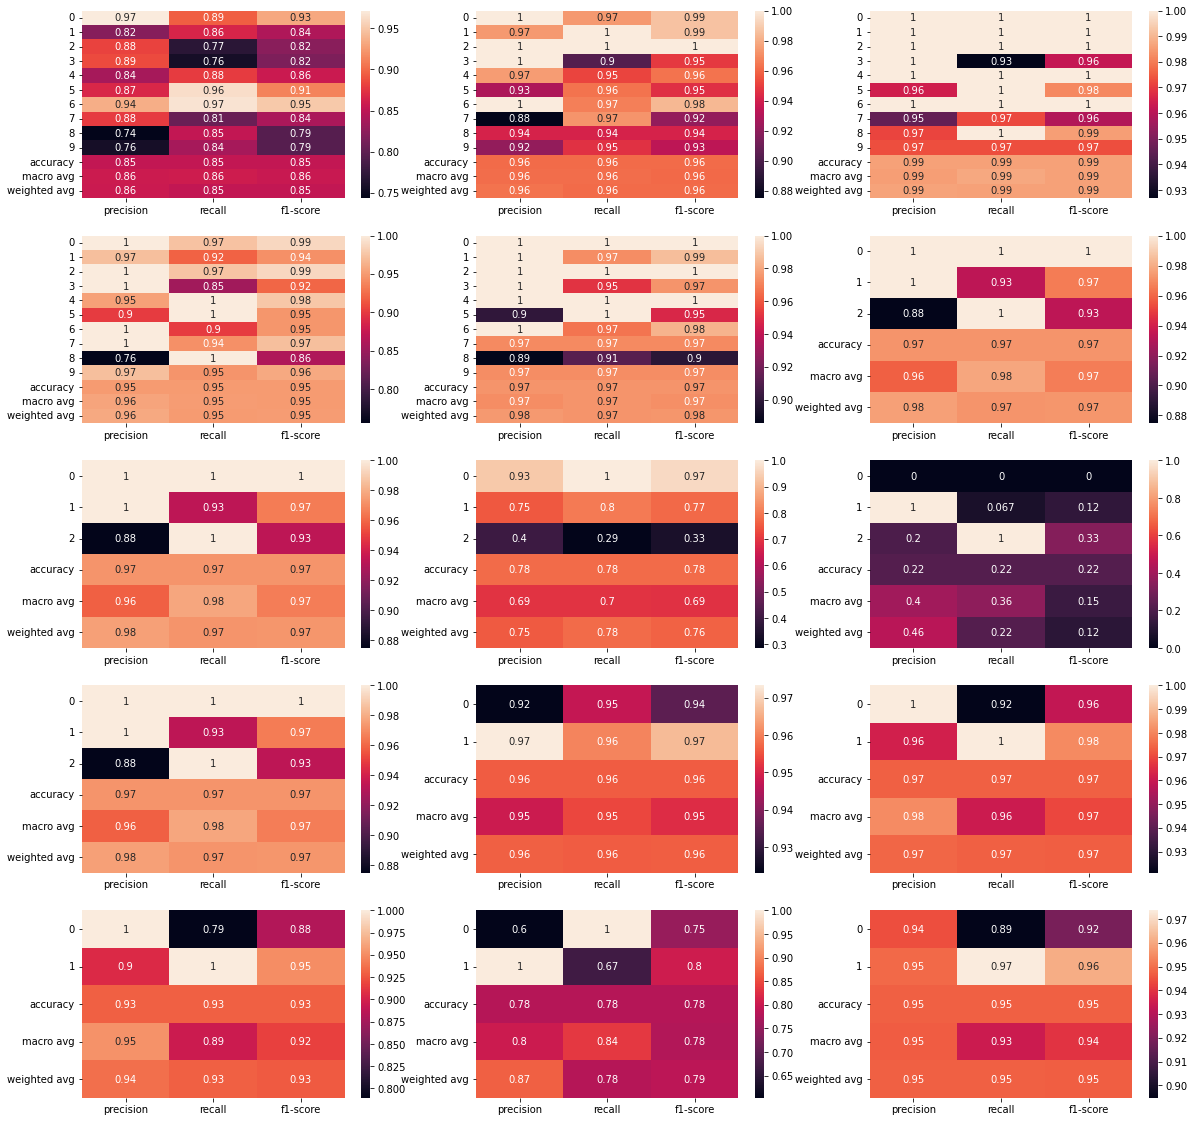

In [158]:
#classification_report의 결과문자열을 seaborn의 heatmap화
#참조:https://stackoverflow.com/questions/61705257/sklearn-plotting-classification-report-gives-a-different-output-than-basic-avg
def plot_accuracy():
    plt.figure(figsize=(20,20))
    inx = 1
    for train in dict:
        clf_report = classification_report(train["y_test"], model_decision_tree(train["X_train"], train["X_test"], train["y_train"], 2 * 87 * random.randrange(1,10)), output_dict=True)               
        plt.subplot(5,3,inx)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
        inx = inx + 1

        clf_report = classification_report(train["y_test"], model_random_forest(train["X_train"], train["X_test"], train["y_train"], 2 * 87 * random.randrange(1,10)), output_dict=True)               
        plt.subplot(5,3,inx)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
        inx = inx + 1

        clf_report = classification_report(train["y_test"], model_svm(train["X_train"], train["X_test"], train["y_train"], 2 * 87 * random.randrange(1,10)), output_dict=True)               
        plt.subplot(5,3,inx)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
        inx = inx + 1

        clf_report = classification_report(train["y_test"], model_sgd(train["X_train"], train["X_test"], train["y_train"], 2 * 87 * random.randrange(1,10)), output_dict=True)               
        plt.subplot(5,3,inx)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
        inx = inx + 1

        clf_report = classification_report(train["y_test"], model_linear(train["X_train"], train["X_test"], train["y_train"], 2 * 87 * random.randrange(1,10)), output_dict=True)               
        plt.subplot(5,3,inx)
        sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
        inx = inx + 1

plot_accuracy()

### 모델 평가지표

- 손글씨 <br>
정확도 : 모든 분류 건수 중 분류기가 몇개가 제대로 분류 했는가?
- 와인 <br>
  정밀도 : 분류가 참이라고 예측하여 실제 참인 확률이 높으므로 더 적합한 지표로 생각 합니다.
- 유방암<br>
  재현율 : 암이 있는 환자를 일반인으로 분류할 확률이 적을 수록 좋은 모델

### <font color="blue">회고</font>

- 파이썬 언어 <br>
 . 파이썬의 기본적인 문법은 사용이 용이하고 쉽다고 느낌 <br>
 . numpy와 pandas와 같이 자주 사용되는 라이브러리의 경우 생소한 항목이나 행렬의 개념이 들어가 파악이 쉽지 않음<br>
 . matplot과 seaborn과 같이 사용이 쉬운 시각화 라이브러리도 따라야할 규칙이 생소하여 좀 더 많은 연습이 필요함<br>
 <hr>
- 인공지능 <br>
 . 토론 중심의 수업으로 개념에 대한 이해를 토론을 통해서 수행해야 하여 반복과정을 좀 더 거친후 인공지능에 대한 소화가 이뤄질듯 함<br>
 . notion혹은 파워포인트로 큰 줄기에 대한 부분을 놓치지 않고 따라가려고 한 부분은 계속 보완하면 좋을 듯함<br>
 <hr>
- 모델의 평가지표  <br>
 . 각 평가지표의 차이를 설명할 수 있으나 이를 현실의 문제에 적용시 혼동 되는 부분이 있음<br>
 . 많은 사례를 가지고 향후 좀 더 많은 연습이 필요한 부분임<br>
  <hr>
- 과정에서 나의 목표  <br>
 . 인공지능/머신러닝/딥러닝에 대한 나만의 정리가 있음<br>
 . 전반적인 흐름을 막힘 없이 설명할 수 있음<br>